# Capstone Project: Machine Learning Fundaments--Codeacademy

## by Albert W. Deckel,  awdeckel@gmail.com


## Date: 1/6/2019


##  Question to be answered:  Is  "relationship status " (i.e., single, divorced, etc) predicted by or related to the following variables:

### 1.drinking
### 2.smoking
### 3.body_type
### 4.sex
### 5.  essay word length
### 6.  age
### 7.  drugs


#  Step 1:  Import the relevant packages

In [55]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix





# Expand the option for the number of columns displayed

In [56]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

# Step 2:  Create DataFrame for analysis--view DataFrame

In [57]:
df = pd.read_csv('profiles.csv')
df.head(1)


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


# Step 3:  Combine all the essays into one variable/column

In [58]:
# combine all the essays into one variable/column
essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

# remove missing data
all_essays = df[essay_cols].replace(np.nan, '', regex=True)

# join essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis =1)

df['essay_len'] = all_essays.apply(lambda x: len(x))



#  Step 4: Take a preliminary count of the data of interest

In [59]:

df['drinks'].dropna(inplace = True)
print (df['drinks'].value_counts()  )

df['smokes'].dropna(inplace = True)
print (df['smokes'].value_counts()  )

df['drugs'].dropna(inplace = True)
print (df['drugs'].value_counts()  )

df['status'].dropna(inplace = True)
print (df['status'].value_counts()  )

df['body_type'].dropna(inplace = True)
print (df['body_type'].value_counts()  )

df['age'].dropna(inplace = True) 
print (df['age'].value_counts()  )

df['income'].dropna(inplace = True) 
print (df['income'].value_counts()  )

df['sex'].dropna(inplace = True)
print (df['sex'].value_counts()  )

df['essay_len'].dropna(inplace = True)
print (df['essay_len'].value_counts()  )

print(df['essay_len'].max())


socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64
never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1

# Step 5:  Visually examine the data using histograms to scan for normal distribuion/variable count of the data

## NOTE:  Drop -1 from Income Column--unknown value

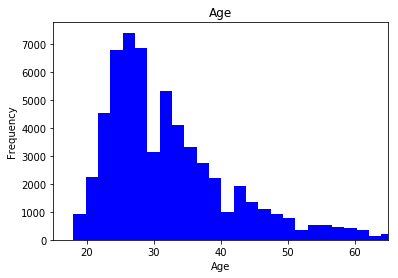

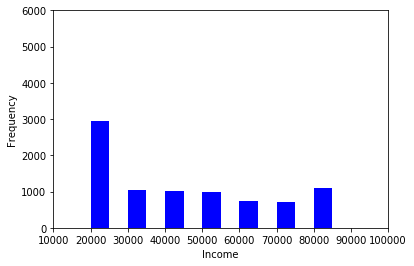

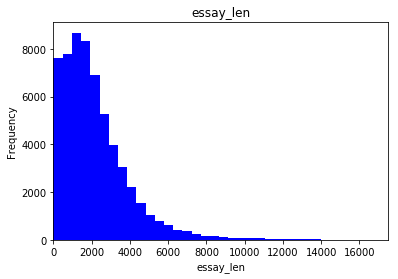

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64


In [60]:
df['age'].dropna(inplace = True)
plt.hist(df['age'], bins = 50, color = 'b')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title ('Age')
plt.xlim(15,65)
df.age.value_counts()
plt.show()

df['income'].dropna(inplace = True)
plt.hist(df['income'], bins = 200, color = 'b')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xlim(10000, 100000)
plt.ylim(0, 6000)
df.income.value_counts()
plt.show()


df['essay_len'].dropna(inplace = True)
plt.hist(df['essay_len'], bins = 200, color = 'b')
plt.xlabel('essay_len')
plt.ylabel('Frequency')
plt.title('essay_len')
plt.xlim(0, 17500)
df.essay_len.value_counts()
plt.show()

print (df['income'].value_counts())


# Step 6:  Convert variables text to numeric values-drop missing data

In [61]:

drink_mapping = {'not at all': 0, 'rarely': 1, 'socially':2, 'often': 3, 'very often': 4, 'desperately': 5}
df['drinks_code'] = df.drinks.map(drink_mapping)
df['drinks_code'].dropna(inplace = True)

smokes_mapping = {'sometimes': 1, 'when drinking':2, 'yes': 3, 'trying to quit': 4, 'no': 0}
df['smokes_code'] = df.smokes.map(smokes_mapping)
df['smokes_code'].dropna(inplace = True)

drugs_mapping = {'never': 0, 'sometimes':1, 'often': 2}
df['drugs_code'] = df.drugs.map(drugs_mapping)
df['drugs_code'].dropna(inplace = True)

status_mapping = {'unknown': 0, 'available':2, 'seeing someone': 3, 'single': 1, 'married':4 }
df['status_code'] = df.status.map(status_mapping)
df['status_code'].dropna(inplace = True)

body_mapping = {'rather not say': 0, 'used up':1, 'thin': 2 , 'skinny' :2   , 'average' :3   ,'curvy' :4   ,
                'a little extra' :5   ,'full figured' :6   ,'overweight' :7   ,'fit' :8   ,'athletic' :8   ,'jacked': 9    }
df['body_type_code'] = df.body_type.map(body_mapping)
df['body_type_code'].dropna(inplace = True)

#df['sex'].dropna()
sex_mapping = {'f': 0, 'm': 1}
df['sex_code'] = df.sex.map(sex_mapping)
df['sex_code'].dropna(inplace = True)



# Step 7:  Plot the categorical data

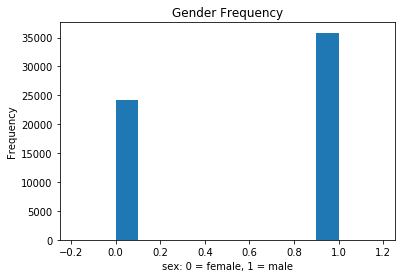

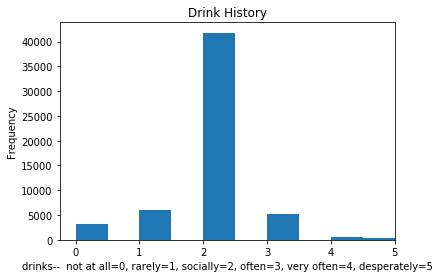

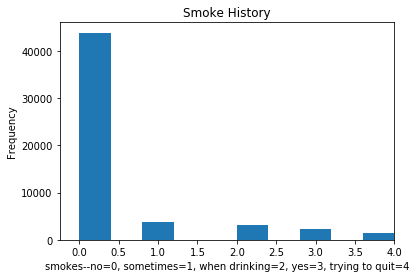

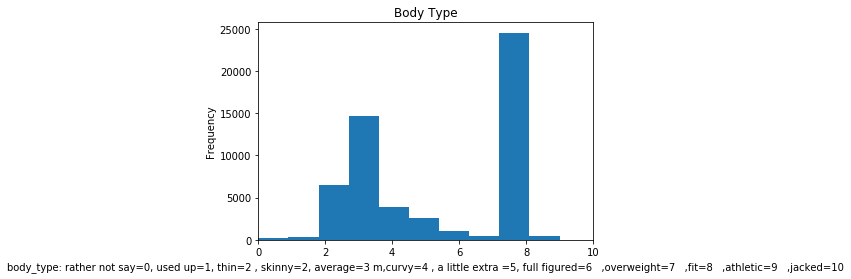

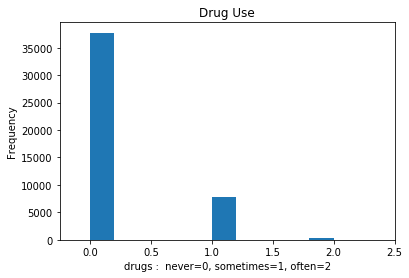

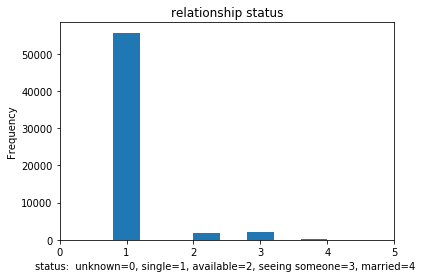

In [62]:
plt.hist(df['sex_code'])
plt.ylabel('Frequency')
plt.xlabel('sex: 0 = female, 1 = male')
plt.xlim(-.25, 1.25)
plt.title('Gender Frequency')
df.sex_code.value_counts()       
plt.show()

df['drinks_code'].dropna(inplace = True)
plt.hist(df['drinks_code'])
plt.xlabel('drinks--  not at all=0, rarely=1, socially=2, often=3, very often=4, desperately=5')
plt.ylabel('Frequency')
plt.title("Drink History")
plt.xlim(-.25, 5)
df.drinks_code.value_counts()
plt.show()

df['smokes_code'].dropna(inplace = True)
plt.hist(df['smokes_code'])
plt.xlabel('smokes--no=0, sometimes=1, when drinking=2, yes=3, trying to quit=4')
plt.ylabel('Frequency')
plt.title('Smoke History')
plt.xlim(-.25, 4)
df.smokes_code.value_counts()
plt.show()

df['body_type_code'].dropna(inplace = True)
plt.hist(df['body_type_code'])
plt.xlabel('body_type: rather not say=0, used up=1, thin=2 , skinny=2, average=3 m,curvy=4 , a little extra =5, full figured=6   ,overweight=7   ,fit=8   ,athletic=9   ,jacked=10')
plt.ylabel('Frequency')
plt.xlim(0, 10)
plt.title('Body Type')
df.body_type_code.value_counts()
plt.show()

df['drugs_code'].dropna(inplace = True)
plt.hist(df['drugs_code'])
plt.xlabel('drugs :  never=0, sometimes=1, often=2')
plt.ylabel('Frequency')
plt.title('Drug Use')
plt.xlim(-.25, 2.5)
df.drugs_code.value_counts()
plt.show()

df['status_code'].dropna(inplace = True)
plt.hist(df['status_code'])
plt.xlabel('status:  unknown=0, single=1, available=2, seeing someone=3, married=4 ')
plt.ylabel('Frequency')
plt.title('relationship status')
plt.xlim(0, 5)
df.body_type_code.value_counts()
plt.show()

# Step 8: Create Master Feature_Data Set

In [63]:
# Note:  cannot use 'income' data, as 48000+ subjects are coded as -1

feature_data = df[['drinks_code', 'age', 
                    'smokes_code', 
                     'status_code',
                    'body_type_code',
                 'sex_code', 'essay_len', 'drugs_code']]

feature_data.dropna(inplace=True)

#set up feature_data to include all vars except 'status'
feature_data_status = feature_data.drop('status_code', axis=1)
x = feature_data_status

# construct the y variable
y = feature_data['status_code']


C:\Users\awdec_000\Anaconda5\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':



# Step 9:  Visualize data another way--using pairwise plots



,drinks_code,age,smokes_code,status_code,body_type_code,sex_code,essay_len,drugs_code
0,2.0,22,1.0,1,5.0,1,2644,0.0
1,3.0,35,0.0,1,3.0,1,1453,1.0
4,2.0,29,0.0,1,8.0,1,725,0.0
7,2.0,31,0.0,1,3.0,0,1240,0.0
9,0.0,37,0.0,1,8.0,1,2420,0.0


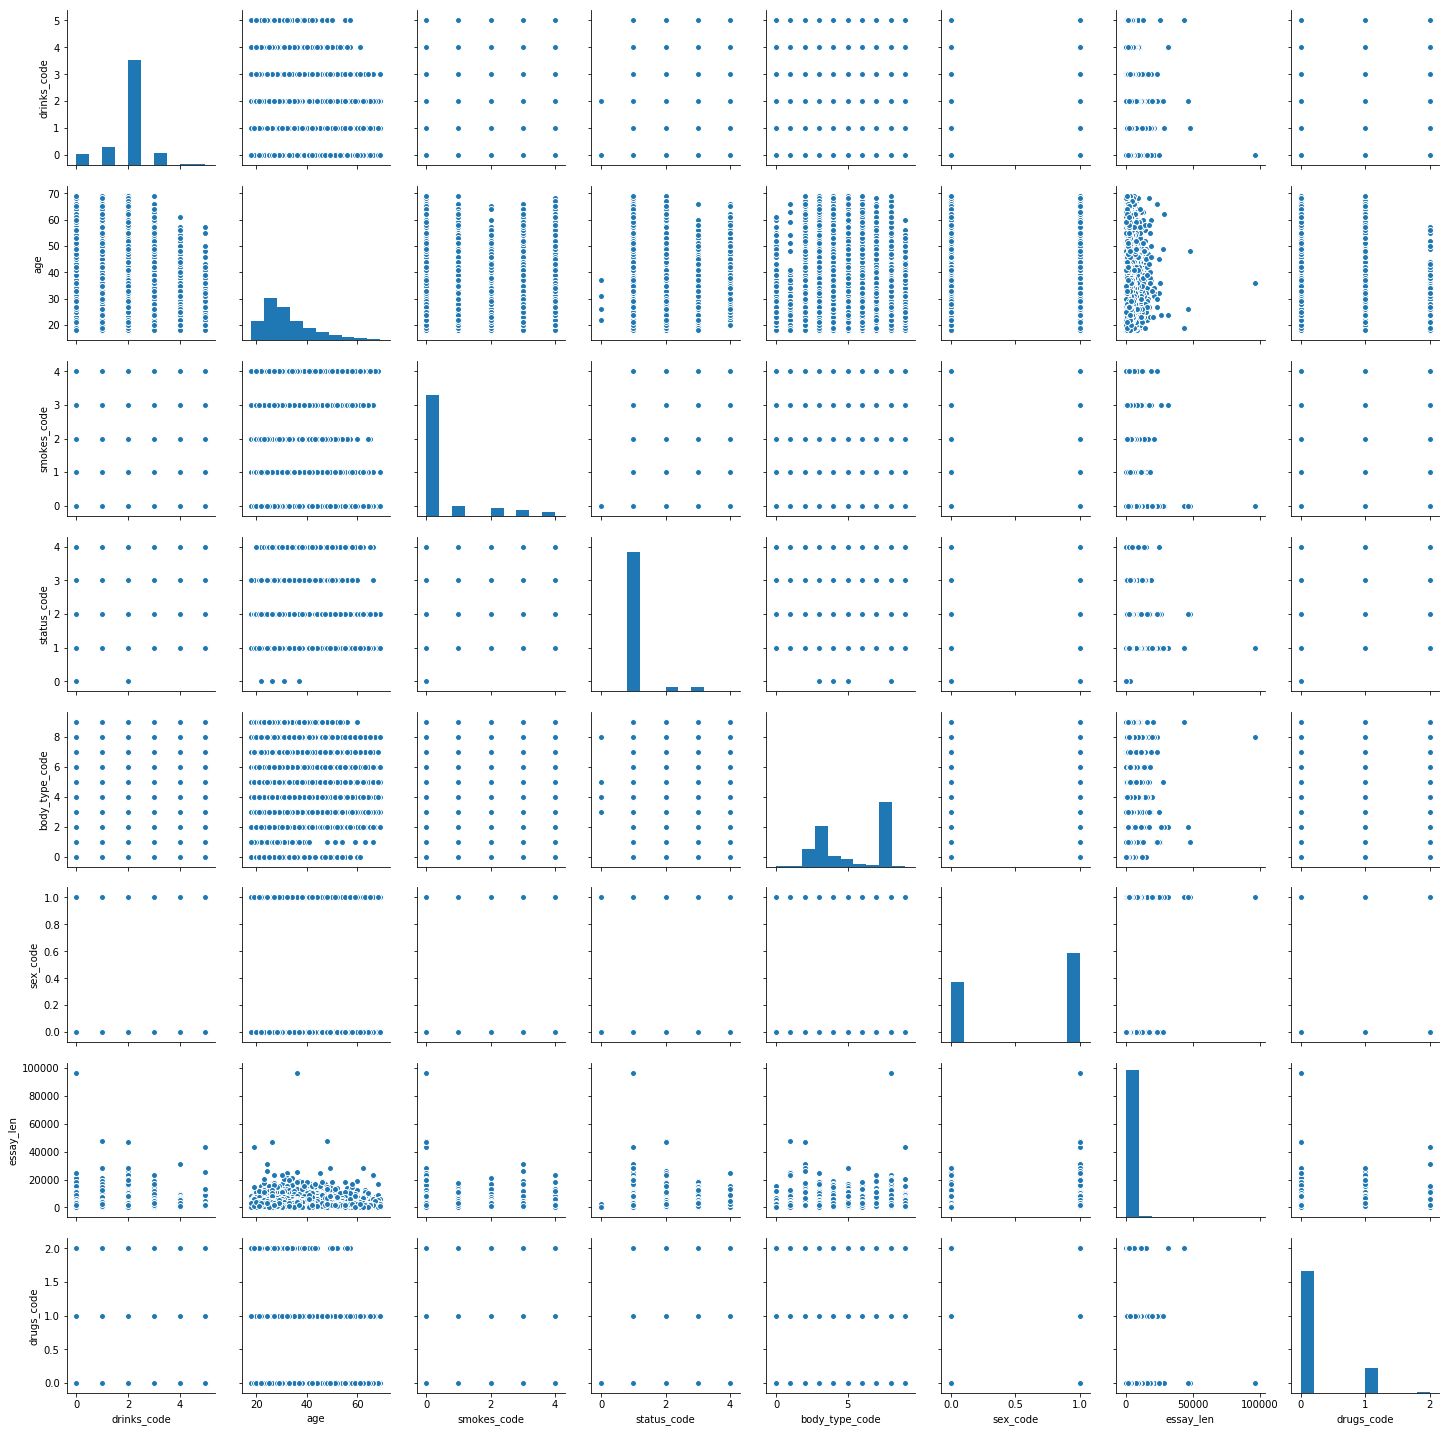

In [64]:
sb.pairplot(feature_data)

feature_data.head()

#  Step 10: Create dataset to examine the relationship between "status" and other variables of interest 

# Step 11:  Normalize Data

In [65]:
# normalize data:  used simpler code taken from Chris Albon, Machine Learning with Python Cookbook 

# place feature data in an array

from sklearn.preprocessing import Normalizer

# normalize and transform data
feature_data_status = Normalizer(norm='l1').transform(feature_data_status)

# convert data to a DataFrame
feature_data_status = pd.DataFrame(feature_data_status)





# Step 12:  Train the data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x,
            y, train_size = 0.8, test_size = 0.2, random_state=6)


#  Step 13:  Use multiple regression to predict relationship 'status'

score,(X_train, y_train) 0.02598587105025363

score,(X_test, y_test) 0.025118751679393148


coefficient_of_determination:  R2 =:  0.025118751679393148

coefficient values  [-1.07569869e-02 -1.28180340e-03 -4.36362064e-03 -7.61180999e-03
 -7.83641759e-03  2.57462624e-05  8.68577070e-02]

time to run the program 0.035025835037231445

intercept 1.1428956876694603



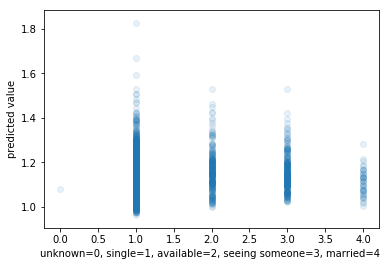

In [67]:
from sklearn.metrics import r2_score

#time program
import time
start = time.time()

#call regression
ols = LinearRegression()

#fit data to linear regresion
start_time = time.time()
ols.fit(X_train, y_train)

#call score

print ('score,(X_train, y_train)', ols.score(X_train, y_train) )
print()
print ('score,(X_test, y_test)', ols.score(X_test, y_test) )
print()

y_pred =ols.predict(X_test)
print()
coefficient_of_determination = r2_score(y_test, y_pred)
print ('coefficient_of_determination:  R2 =: ', coefficient_of_determination)
print()

#print out the coefficients of the regression
print ('coefficient values ',ols.coef_)
print ()

end = time.time()
print ('time to run the program', end-start)
print ()

# find the intercept 
print ('intercept', ols.intercept_ )
print()

plt.scatter (y_test,  y_pred, alpha = .1)
plt.ylabel ('predicted value')
plt.xlabel('unknown=0, single=1, available=2, seeing someone=3, married=4 ')
plt.show();





#  Step 14:  Use of KNeighborsRegressor to predict relationship 'status'


C:\Users\awdec_000\Anaconda5\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


X_train shape: (27598, 7)
y_train shape: (27598,)
X_test shape: (11829, 7)
y_test shape: (11829,)

coefficient_of_determination:  R2 =:  -0.4202048808867256

time to run the program 0.9146468639373779


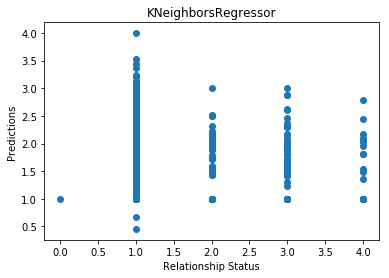

In [68]:
from sklearn.neighbors import KNeighborsRegressor

feature_data = df[['drinks_code', 'age', 
                    'smokes_code', 
                     'status_code',
                    'body_type_code',
                 'sex_code', 'essay_len', 'drugs_code']]

feature_data.dropna(inplace=True)

#set up feature_data to include all vars except 'status'
feature_data_status = feature_data.drop('status_code', axis=1)

# construct the y variable
y = feature_data['status_code']

X_train, X_test, y_train, y_test = train_test_split(feature_data_status,
            y, train_size = 0.8, test_size = 0.2, random_state=6)


# normalize data:  used simpler code taken from Chris Albon, Machine Learning with Python Cookbook 
from sklearn.preprocessing import Normalizer

# normalize and transform data
feature_data_status = Normalizer(norm='l1').transform(feature_data_status)

# convert data to a DataFrame
feature_data_status = pd.DataFrame(feature_data_status)

X_train, X_test, y_train, y_test = train_test_split(
    feature_data_status, feature_data['status_code'], random_state=6, test_size = .3)

training_points = X_train
training_labels = y_train

start_time = time.time()

regressor = KNeighborsRegressor(n_neighbors = 2,
            weights = "distance")  

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)                                                     
#print (regressor.predict(X_test) )

print()
coefficient_of_determination = r2_score(y_test, y_pred)
print ('coefficient_of_determination:  R2 =: ', coefficient_of_determination)
print()

end = time.time()
print ('time to run the program', end-start)

# plot the data
plt.scatter( y_test, y_pred)
plt.xlabel('Relationship Status')
plt.ylabel('Predictions')
plt.title('KNeighborsRegressor')
plt.show()

# These won't run
#print (classification_report(y_test, y_pred))
#print ('test confusion_matrix')
#confusion_matrix(y_test, y_pred)


# Step 15:  Using K-Nearest Neighbors classification

C:\Users\awdec_000\Anaconda5\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


X_train shape: (27598, 7)
y_train shape: (27598,)
X_test shape: (11829, 7)
y_test shape: (11829,)


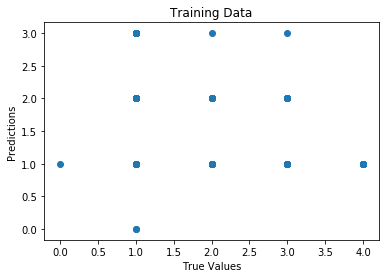


Train Accuracy, Precision, Recall, and F1 Scores

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.94      1.00      0.96     11066
          2       0.12      0.02      0.03       332
          3       0.08      0.00      0.01       363
          4       0.00      0.00      0.00        67

avg / total       0.88      0.93      0.90     11829


accuracy 0.9316932961366134
recall 0.9316932961366134
precision 0.8817261503545546
f1 0.9037144984661977
Time to run the algorithm  0.3782675266265869





C:\Users\awdec_000\Anaconda5\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\awdec_000\Anaconda5\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\awdec_000\Anaconda5\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


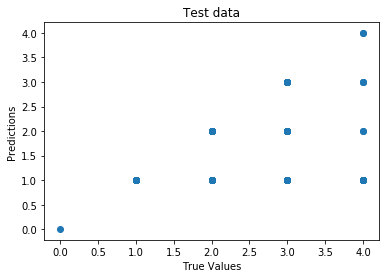


Test Accuracy, Precision, Recall, and F1 Scores

Total time to run algorithm 0.3782675266265869
accuracy 0.9401470961197058
recall 0.9401470961197058
precision 0.9305115069316553
f1 0.9157193349774686
Total time to run algorithm 0.6984961032867432




             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.94      1.00      0.97     11066
          2       0.59      0.08      0.14       332
          3       0.89      0.07      0.13       363
          4       1.00      0.03      0.06        67

avg / total       0.93      0.94      0.92     11829



test confusion_matrix


array([[    1,     0,     0,     0,     0],
       [    0, 11066,     0,     0,     0],
       [    0,   305,    27,     0,     0],
       [    0,   321,    17,    25,     0],
       [    0,    60,     2,     3,     2]], dtype=int64)

In [69]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# construc the master features_data variable
feature_data = df[['drinks_code', 'age', 
                    'smokes_code', 
                     'status_code',
                    'body_type_code',
                 'sex_code', 'essay_len', 'drugs_code']]
feature_data.dropna(inplace=True)

#set up feature_data to include all vars except 'status'
feature_data_status = feature_data.drop('status_code', axis=1)

# construct the y variable
y = feature_data['status_code']

start = time.time()

# normalize data:  used simpler code taken from Chris Albon, Machine Learning with Python Cookbook 
from sklearn.preprocessing import Normalizer

# normalize and transform data
feature_data_status = Normalizer(norm='l1').transform(feature_data_status)

# convert data to a DataFrame
feature_data_status = pd.DataFrame(feature_data_status)

X_train, X_test, y_train, y_test = train_test_split(
    feature_data_status, feature_data['status_code'], random_state=6, test_size = .3)


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
#print()

start = time.time()

# Run KNeighborsClassifier Using training data

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# plot the data
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Training Data')
plt.show()

print ()
print ('Train Accuracy, Precision, Recall, and F1 Scores')
print ()
print (classification_report(y_test, y_pred))
print()
print ('accuracy', accuracy_score(y_test, y_pred) )
print ('recall', recall_score(y_test, y_pred, average= 'weighted') )
print ('precision', precision_score(y_test, y_pred, average= 'weighted') )
print ('f1', f1_score(y_test, y_pred, average = 'weighted') )

end = time.time()
print ('Time to run the algorithm ', end - start)

print()

# rerun analysis using test data

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_test, y_test)
y_pred = knn.predict(X_test)
print()
print()

# plot the data
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Test data')
plt.show()

print ()
print ('Test Accuracy, Precision, Recall, and F1 Scores')
print ()
 
print ('Total time to run algorithm', end - start)

print ('accuracy', accuracy_score(y_test, y_pred) )
print ('recall', recall_score(y_test, y_pred, average= 'weighted') )
print ('precision', precision_score(y_test, y_pred, average= 'weighted') )
print ('f1', f1_score(y_test, y_pred, average = 'weighted') )

end = time.time()
print ('Total time to run algorithm', end - start)
print()
print()
unknown_points = unknown_points = [
    [2,30,1,4,1,3000,1],
]
print()
print()
print (classification_report(y_test, y_pred))
print()
print()

print ('test confusion_matrix')
confusion_matrix(y_test, y_pred)



# Step 16:  Use of K-Means Algo

X_train shape: (27598, 7)
y_train shape: (27598,)
X_test shape: (11829, 7)
y_test shape: (11829,)


C:\Users\awdec_000\Anaconda5\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


train len y_pred 11829
11829 11829


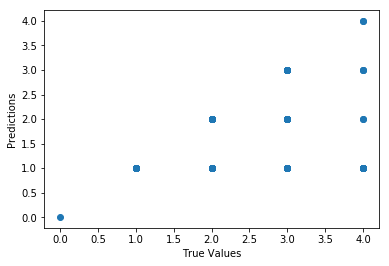

accuracy 0.9401470961197058
recall 0.9401470961197058
precision 0.9305115069316553
f1 0.9157193349774686


total time to run program 0.4293038845062256

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         1
          1       0.94      1.00      0.97     11066
          2       0.59      0.08      0.14       332
          3       0.89      0.07      0.13       363
          4       1.00      0.03      0.06        67

avg / total       0.93      0.94      0.92     11829

test confusion_matrix


array([[    1,     0,     0,     0,     0],
       [    0, 11066,     0,     0,     0],
       [    0,   305,    27,     0,     0],
       [    0,   321,    17,    25,     0],
       [    0,    60,     2,     3,     2]], dtype=int64)

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# construc the master features_data variable
feature_data = df[['drinks_code', 'age', 
                    'smokes_code', 
                     'status_code',
                    'body_type_code',
                 'sex_code', 'essay_len', 'drugs_code']]
feature_data.dropna(inplace=True)

#set up feature_data to include all vars except 'status'
feature_data_status = feature_data.drop('status_code', axis=1)

# construct the y variable
y = feature_data['status_code']

# normalize data:  used simpler code taken from Chris Albon, Machine Learning with Python Cookbook 
from sklearn.preprocessing import Normalizer

# normalize and transform data
feature_data_status = Normalizer(norm='l1').transform(feature_data_status)

# convert data to a DataFrame
feature_data_status = pd.DataFrame(feature_data_status)

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    feature_data_status, feature_data['status_code'], random_state=6, test_size = .3)


print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
#print()


classifier = KMeans(n_clusters = 2, random_state=6)
model = classifier.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ('train len y_pred',len(y_pred))
print (len (y_test), len(y_pred))

# plot the data
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print ('accuracy', accuracy_score(y_test, y_pred) )
print ('recall', recall_score(y_test, y_pred, average= 'weighted') )
print ('precision', precision_score(y_test, y_pred, average= 'weighted') )
print ('f1', f1_score(y_test, y_pred, average = 'weighted') )
print()

end = time.time()
print()
print ('total time to run program', end - start)
print()

unknown_points = [
    [2,30,1,4,1,3000,1],
]


print (classification_report(y_tests, y_preds))

print ('test confusion_matrix')
confusion_matrix(y_tests, y_preds)
